In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionFitting.RegionFitting import RegionFitting
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.Posterior.ParameterEstimation import ParameterEstimation


In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from paths_func import cross_pandas_spectra
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path_dr16 = "/home/favila/smbh_mass/dr16"
#path_dr16 = "/home/felipe/work/SMBH_estimation/dr16"

In [5]:
#file_paths,objs_panda  = cross_pandas_spectra(path_dr16,"sdss_fits","dr16_pandas.csv")
#objs_panda_sort =objs_panda
from astropy.io import fits 
file_paths,objs_panda = cross_pandas_spectra(path_dr16,"new_sub_sample_sdss_fits","subsample_07_03_25_full.csv")
n_pixels = [fits.open(i)[1].header["NAXIS2"] for i in objs_panda.fit_path.values]
objs_panda["NAXIS2"] = n_pixels
#objs_panda_sort = objs_panda[objs_panda.NAXIS2 == 4636 & objs_panda.Z_FIT<1.0]#.sort_values("SN_MEDIAN_ALL",ascending=False)#[:1500][:100][:10]
#objs_panda_sort = objs_panda_sort.reset_index(drop=True)

You cross match found 11538


In [6]:
#test2 = Sheapectral.from_pickle("/home/favila/smbh_mass/sheap/notebooks/first_save.pkl")

In [7]:
list(objs_panda.sort_values("SN_MEDIAN_ALL",ascending=False).NAXIS2)

[3822,
 3824,
 3844,
 3758,
 4594,
 4600,
 4591,
 4595,
 4615,
 3845,
 3829,
 4617,
 4590,
 4612,
 3837,
 4591,
 4617,
 4612,
 4594,
 3844,
 4609,
 4618,
 4618,
 3836,
 4587,
 4614,
 4585,
 4577,
 4613,
 4613,
 3836,
 4582,
 4578,
 3841,
 4622,
 4607,
 4605,
 4601,
 4580,
 3819,
 4613,
 4577,
 3844,
 4603,
 3842,
 3800,
 3842,
 3843,
 4614,
 4628,
 4613,
 3828,
 3825,
 4601,
 4591,
 4579,
 4586,
 4623,
 4628,
 4590,
 4602,
 3834,
 4573,
 4606,
 4639,
 4623,
 3837,
 3816,
 4586,
 4589,
 4585,
 4605,
 4569,
 4605,
 4628,
 4577,
 4606,
 4571,
 3841,
 4595,
 3804,
 3805,
 4594,
 3846,
 4587,
 4581,
 4601,
 4600,
 4626,
 3830,
 4602,
 4615,
 4586,
 4623,
 4623,
 3807,
 4595,
 3847,
 4606,
 4596,
 3837,
 4602,
 3833,
 4625,
 4575,
 3846,
 3847,
 3843,
 4612,
 3809,
 4601,
 3822,
 4609,
 3842,
 4579,
 3843,
 3843,
 4584,
 4604,
 4603,
 3844,
 4580,
 4597,
 2918,
 3838,
 3832,
 3836,
 3829,
 3813,
 3659,
 3826,
 4587,
 4613,
 4581,
 4582,
 4620,
 3817,
 4585,
 4580,
 3826,
 4629,
 4602,
 3824,

In [8]:
objs_panda_sort = objs_panda[(objs_panda.NAXIS2 == 4614)].sort_values("SN_MEDIAN_ALL",ascending=False)

In [9]:
import numpy as np 
{key: [np.median(objs_panda[objs_panda.NAXIS2==key]["SN_MEDIAN_ALL"].values),value] for key,value in objs_panda.value_counts("NAXIS2").to_dict().items()}

{4590: [np.float64(2.8709263801574707), 236],
 4614: [np.float64(2.9958181381225586), 225],
 4615: [np.float64(3.247713804244995), 225],
 4613: [np.float64(2.87721049785614), 218],
 4588: [np.float64(3.0799492597579956), 210],
 4589: [np.float64(2.9392731189727783), 209],
 4605: [np.float64(2.890620231628418), 207],
 4594: [np.float64(2.9391292333602905), 202],
 4617: [np.float64(3.22165846824646), 201],
 4592: [np.float64(2.8729822635650635), 197],
 4591: [np.float64(3.0069925785064697), 193],
 4593: [np.float64(3.199700951576233), 192],
 4595: [np.float64(3.195770502090454), 190],
 4616: [np.float64(3.156723976135254), 187],
 4587: [np.float64(2.787569522857666), 185],
 4603: [np.float64(2.771456003189087), 185],
 4623: [np.float64(3.293220043182373), 184],
 4606: [np.float64(2.822915196418762), 182],
 4600: [np.float64(3.029001474380493), 181],
 4624: [np.float64(3.2299466133117676), 180],
 4602: [np.float64(3.090077519416809), 180],
 4625: [np.float64(2.7397093772888184), 179],
 46

In [10]:
objs_panda.value_counts("NAXIS2").to_dict()

{4590: 236,
 4614: 225,
 4615: 225,
 4613: 218,
 4588: 210,
 4589: 209,
 4605: 207,
 4594: 202,
 4617: 201,
 4592: 197,
 4591: 193,
 4593: 192,
 4595: 190,
 4616: 187,
 4587: 185,
 4603: 185,
 4623: 184,
 4606: 182,
 4600: 181,
 4624: 180,
 4602: 180,
 4625: 179,
 4604: 178,
 4630: 176,
 4583: 172,
 4601: 171,
 4628: 171,
 4612: 170,
 4596: 169,
 4611: 166,
 4599: 165,
 4598: 164,
 4618: 164,
 4620: 161,
 4629: 161,
 4626: 160,
 4631: 159,
 4621: 159,
 4607: 158,
 4627: 157,
 4586: 155,
 4584: 155,
 4622: 153,
 4608: 152,
 4632: 150,
 4619: 146,
 4610: 141,
 4597: 139,
 4582: 131,
 4585: 123,
 4609: 114,
 4581: 112,
 4633: 109,
 4580: 90,
 4636: 83,
 4634: 83,
 4579: 78,
 4635: 77,
 4638: 72,
 4639: 66,
 4576: 63,
 3841: 61,
 4577: 59,
 4637: 58,
 3842: 56,
 4573: 54,
 4578: 52,
 4570: 50,
 3843: 50,
 3838: 49,
 4571: 49,
 3837: 48,
 3840: 44,
 3835: 44,
 4572: 44,
 3829: 44,
 4640: 43,
 3845: 42,
 4575: 39,
 3844: 38,
 3836: 37,
 4568: 37,
 4574: 36,
 3834: 35,
 3833: 35,
 4569: 33,
 

**systems that will be use to test**
- Constins halpha hbeta power law '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8222-57431-0561.fits'
- host dominated '/home/favila/smbh_mass/dr16/new_sub_sample_sdss_fits/8363-58140-0132.fits'

In [11]:
#objs_panda_sort.values[8]

In [12]:
objs_panda_sort.dr_name.values

array(['8760-57672-0398', '11321-58425-0980', '9399-58125-0786',
       '8068-57185-0298', '7718-57362-0337', '8755-58138-0842',
       '7734-58133-0522', '11346-58429-0693', '5200-56091-0874',
       '8490-57104-0102', '11554-58456-0826', '3839-55575-0754',
       '7640-57311-0416', '11654-58543-0787', '7893-57286-0111',
       '7653-57306-0064', '4358-55833-0860', '4212-55447-0644',
       '4310-55508-0576', '8301-57390-0046', '4033-55332-0548',
       '8404-57481-0054', '7678-57282-0014', '10262-58543-0654',
       '6004-56066-0736', '4224-55481-0753', '8491-57488-0094',
       '8524-57656-0324', '8489-57483-0320', '3925-55338-0038',
       '8058-57196-0479', '8433-57488-0216', '8294-57365-0190',
       '3857-55272-0812', '7410-57104-0114', '3851-55302-0678',
       '4266-55486-0590', '4377-55828-0854', '7893-57286-0352',
       '8760-57672-0286', '4377-55828-0630', '4209-55478-0592',
       '7286-57096-0376', '7642-57651-0431', '4994-55739-0698',
       '9143-57665-0256', '7824-572

In [13]:
#objs_panda.value_counts("NAXIS2")

In [14]:
# import numpy as np 
# def fits_reader_sdss(file):
#     """
#     Read an SDSS FITS file and extract wavelength, flux, and inverse variance,
#     scaled appropriately by the BUNIT header.
#     """
#     hdul = fits.open(file)
#     flux_scale = float(hdul[0].header["BUNIT"].split(" ")[0])
#     data_array = np.array([
#         10**hdul[1].data["loglam"],
#         hdul[1].data["flux"] * flux_scale,
#         flux_scale / np.sqrt(hdul[1].data["ivar"])
#     ])
#     header_array = np.array([
#         hdul[0].header["PLUG_RA"],
#         hdul[0].header["PLUG_DEC"]
#     ])
#     return data_array, header_array

In [15]:
# shapes = [fits_reader_sdss(file)[0].shape for file in objs_panda_sort.fit_path.values]

In [74]:
coords,spectra_reshaped,_ = parallel_reader(objs_panda_sort.fit_path.values)
coords = jnp.array(coords)
spectra_reshaped = jnp.array(spectra_reshaped)

/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: RuntimeWarning: divide by zero encountered in divide
  flux_scale / np.sqrt(hdul[1].data["ivar"])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:22: Runtim

In [ ]:
test_clase = Sheapectral(spectra_reshaped,z=objs_panda_sort["Z_DR16Q"].values,coords = coords,names = objs_panda_sort.dr_name.values)

extinction correction will be do it, change 'extinction_correction' to done if you want to avoid this step
redshift correction will be do it, change 'redshift_correction' to done if you want to avoid this step


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

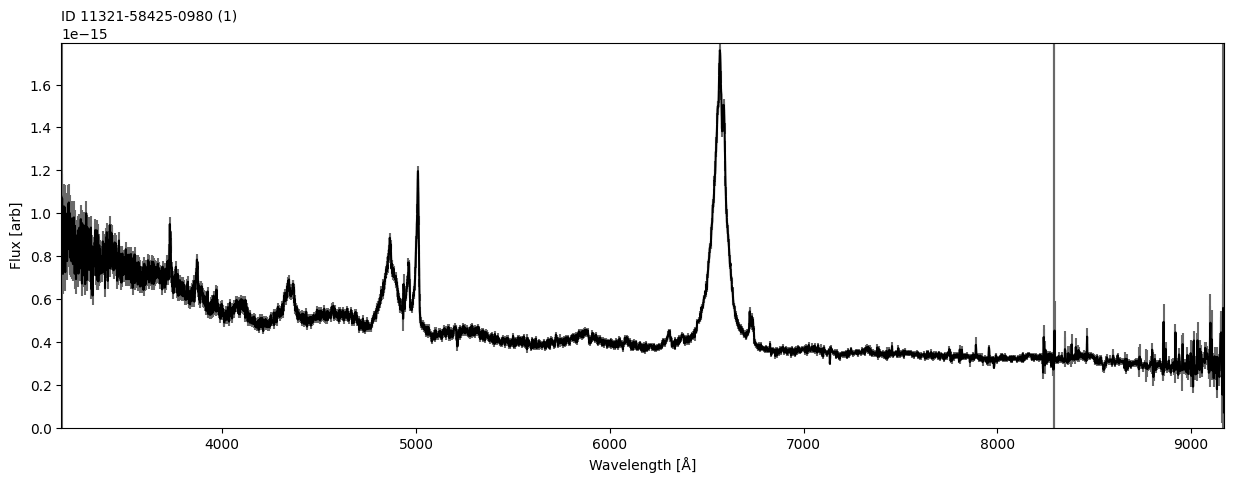

In [101]:
test_clase.quicklook(1)

In [82]:
test_clase.build_region(4400, 5600,template_mode_fe=True,n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=True)

added OP template


In [90]:
test_clase.fit_region()

Fitting 225 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4


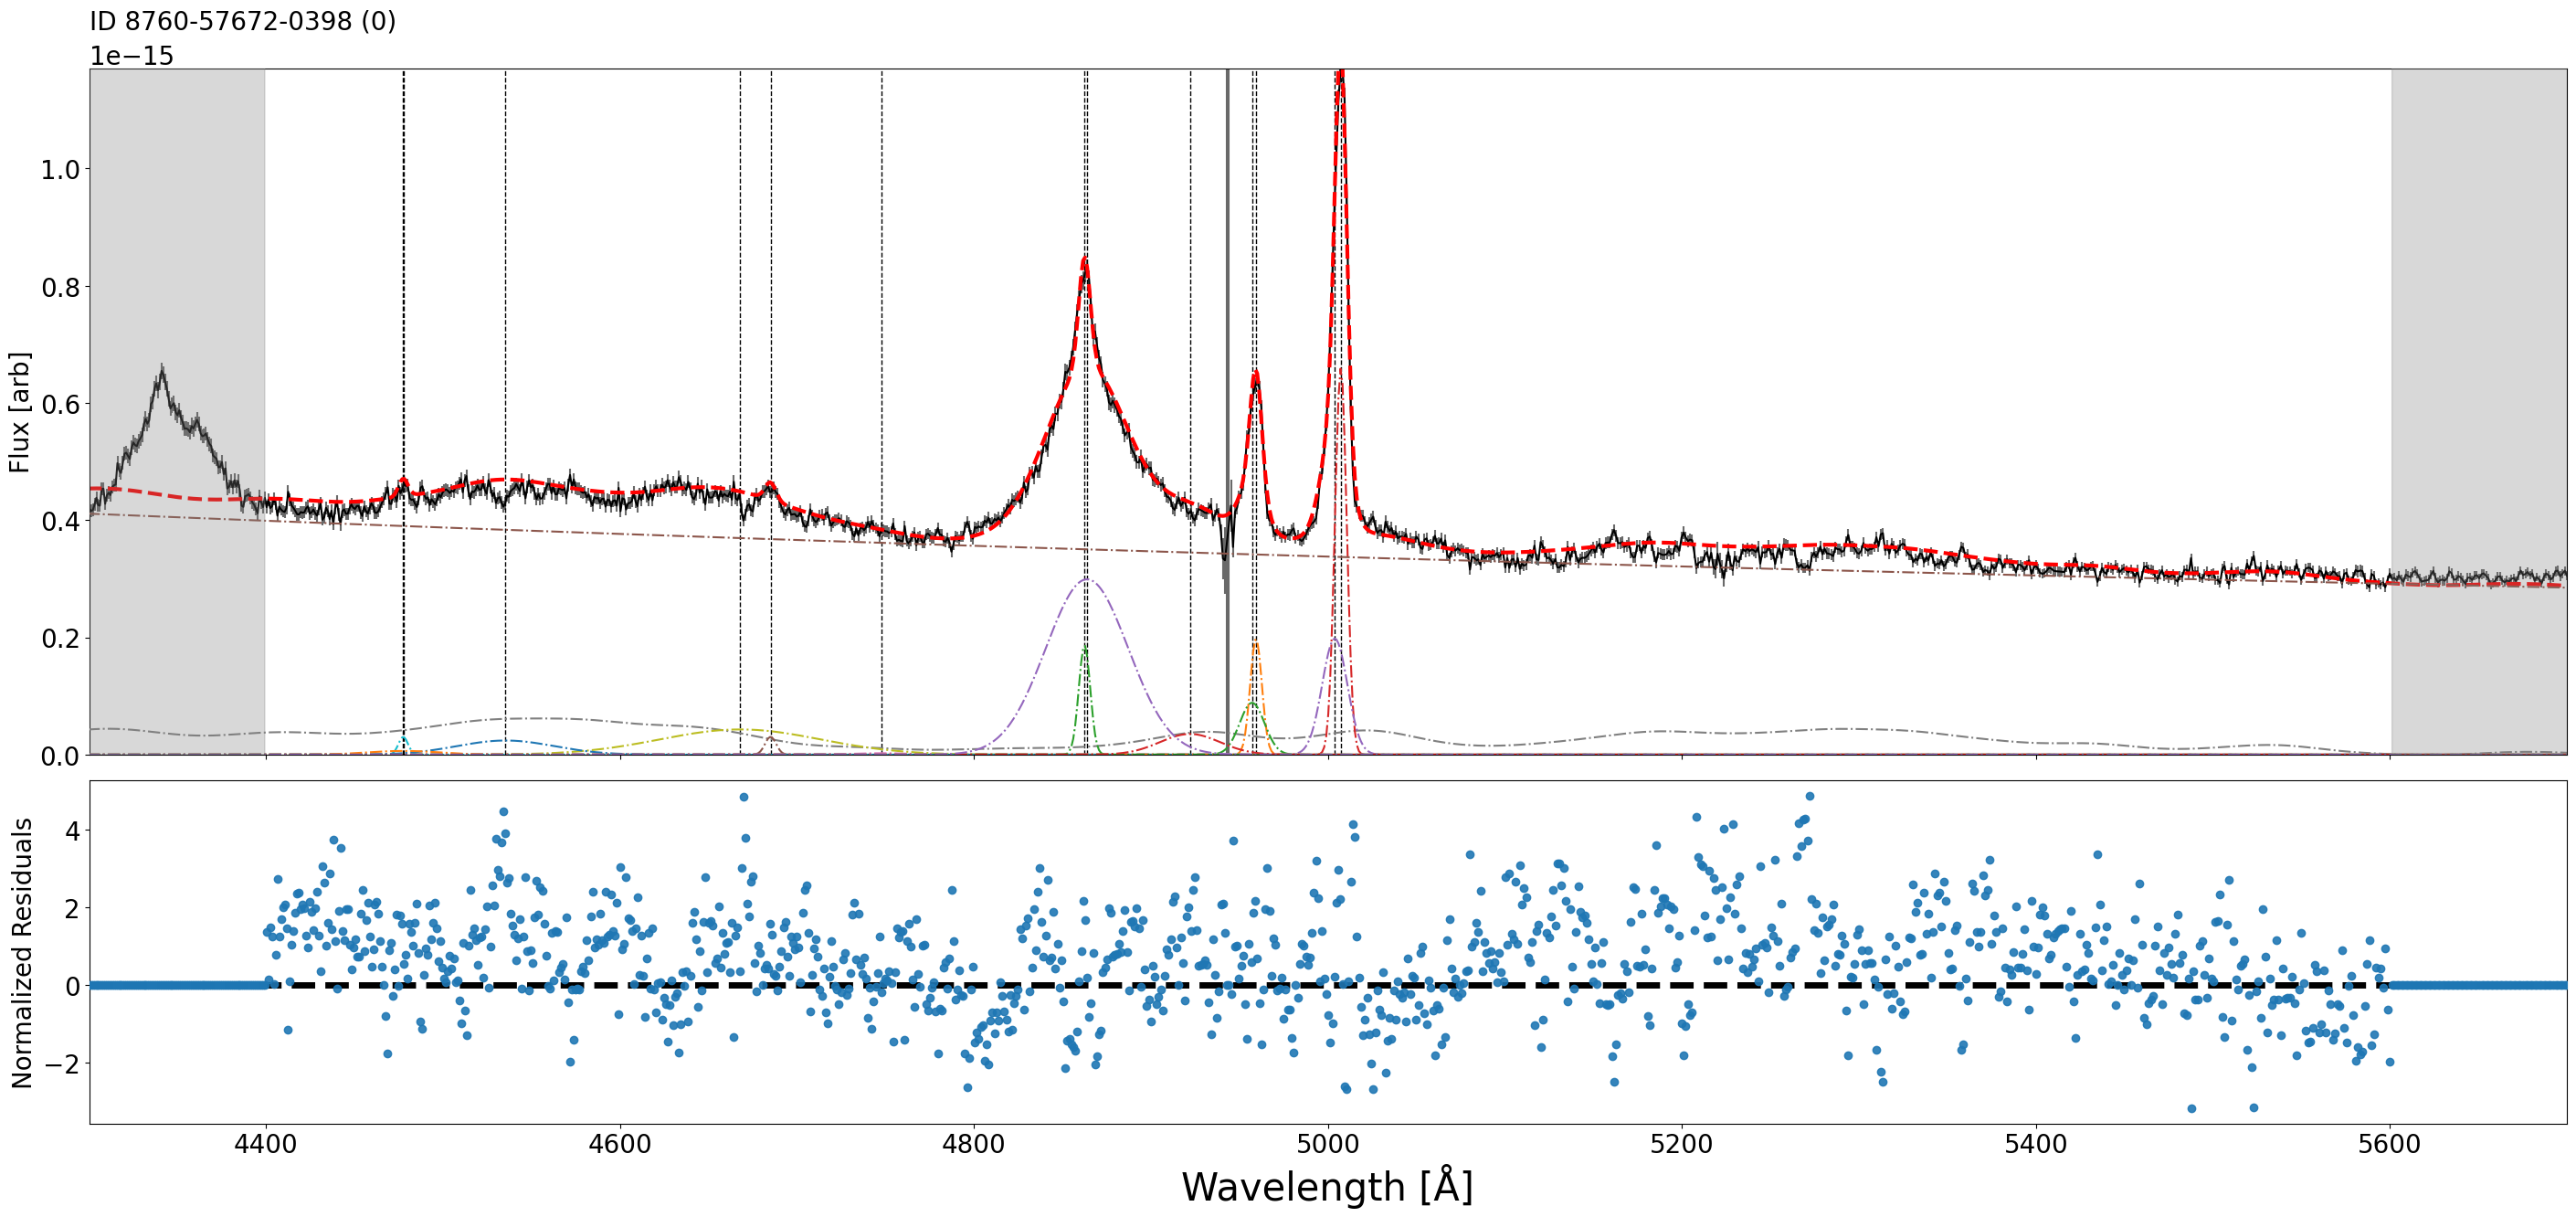

In [91]:
region_plot = SheapPlot(test_clase)
n = 0
region_plot.plot(n,add_name=False,xlim=[4300,5700])#207

In [85]:
_region_defs = test_clase._save()

Estimated pickle size: 25437.33 KB


In [86]:
{key:type(value) for key,value in _region_defs.items()}

{'names': numpy.ndarray,
 'spectra': numpy.ndarray,
 'coords': numpy.ndarray,
 'z': numpy.ndarray,
 'extinction_correction': str,
 'redshift_correction': str,
 'params': numpy.ndarray,
 'params_dict': dict,
 'mask': numpy.ndarray,
 'region_defs': list,
 'profile_params_index_list': list,
 'profile_names': list,
 'fitting_rutine': dict,
 'outer_limits': tuple}

In [92]:
test_clase.save_to_pickle("first_save.pkl")

Estimated pickle size: 25437.33 KB


In [99]:
test2.params.shape

(225, 44)

In [93]:
test2 = Sheapectral.from_pickle("/home/favila/smbh_mass/sheap/notebooks/first_save.pkl")

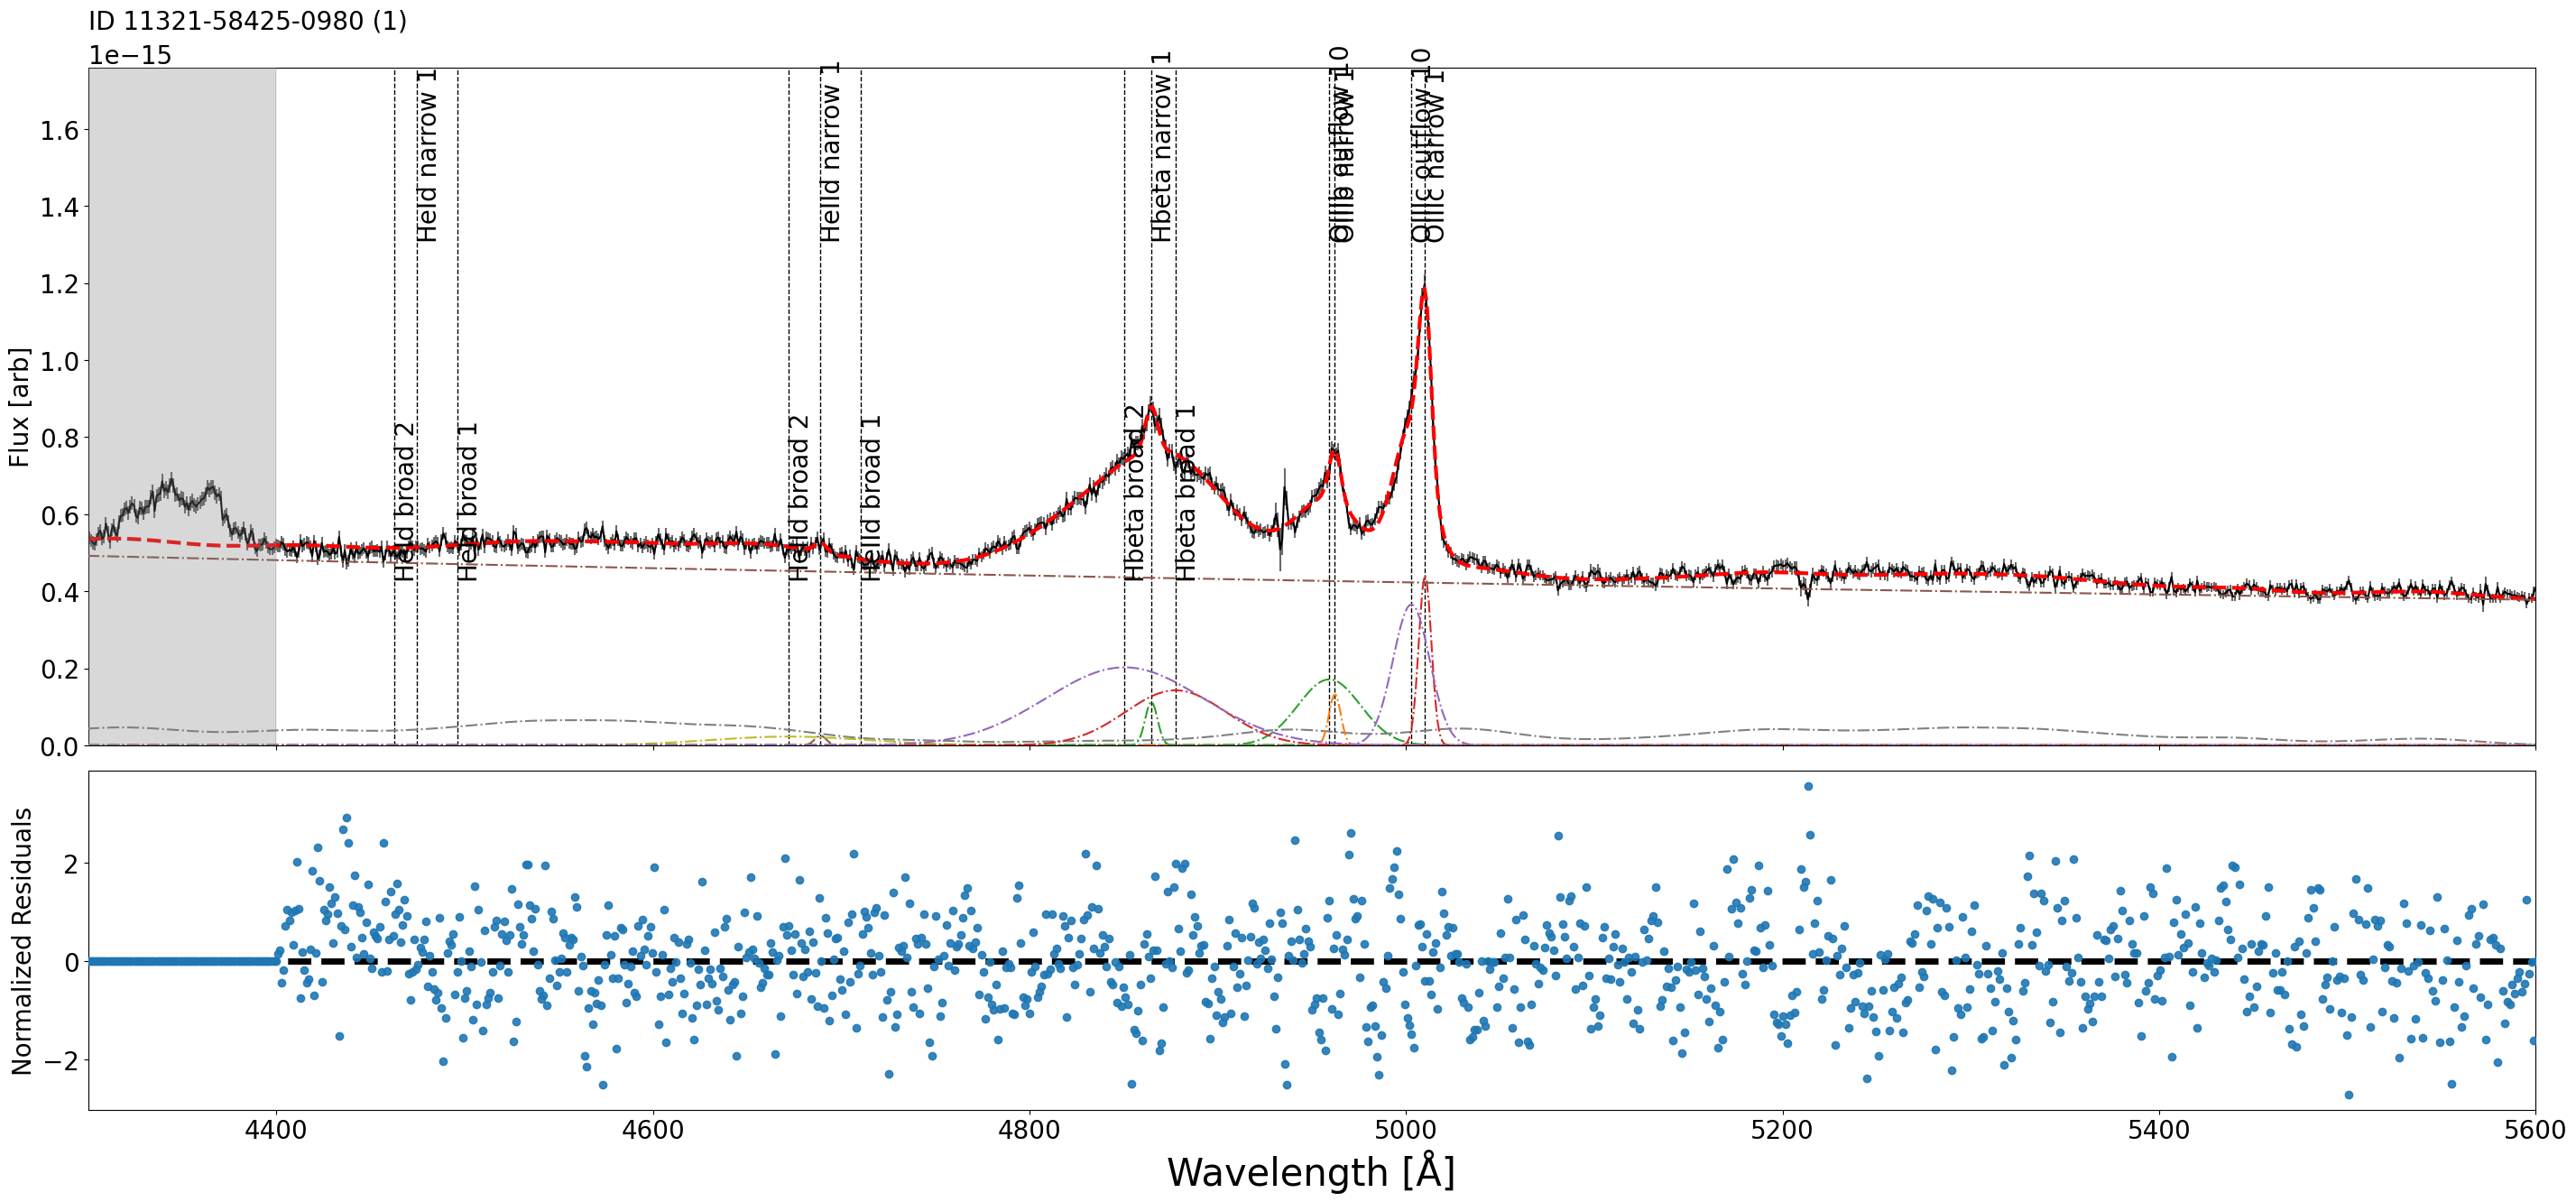

In [94]:
region_plot = SheapPlot(test2)
n = 1
region_plot.plot(n,add_name=True,xlim=[4300,5600])#207

In [218]:
# from sheap.RegionHandler.RegionBuilderv2 import RegionBuilderv2
# from sheap.RegionHandler.RegionFittingv2 import RegionFittingv2,is_list_of_SpectralLine
# from sheap.RegionHandler.suportclass import SpectralLine

In [12]:
region = RegionBuilder(4400, 5600,template_mode_fe=True,n_broad=2,add_outflow=True,by_region=True,force_linear=False,add_balmercontiniumm=True)

added OP template


In [13]:
region._fitting_rutine()

{'complex_region': [SpectralLine(center=0, line_name='feop', kind='fe', component=21, amplitude=0, how='template', region='OP', profile='fitFeOP', which='OP'),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='narrow', component=1, amplitude=1.0, how=None, region='helium', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='broad

In [221]:
# power_test = {'complex_region':[region.regions_to_fit[-1]],'outer_limits':region._fitting_rutine(add_step=False)['outer_limits'],
#               "inner_limits":region._fitting_rutine(add_step=False)['inner_limits'],
#               "fitting_rutine":{'step1': {'tied':[],"non_optimize_in_axis":3}}}

In [14]:
region._fitting_rutine()

{'complex_region': [SpectralLine(center=0, line_name='feop', kind='fe', component=21, amplitude=0, how='template', region='OP', profile='fitFeOP', which='OP'),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4958.896072, line_name='OIIIb', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='narrow', component=1, amplitude=1.0, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=5006.803341, line_name='OIIIc', kind='outflow', component=10, amplitude=0.5, how=None, region='narrow_basic', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='narrow', component=1, amplitude=1.0, how=None, region='helium', profile=None, which=None),
  SpectralLine(center=4685.71, line_name='HeIId', kind='broad

In [15]:
aja = RegionFitting(region._fitting_rutine(num_steps_list=[3000,3000]))
aja(Spectra,renormalize=False)
#aja._build_fit_componentsv2()

Fitting 225 spectra
STEP1
learning_rate: 0.1 num_steps: 3000 non_optimize_in_axis: 3
STEP2
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4


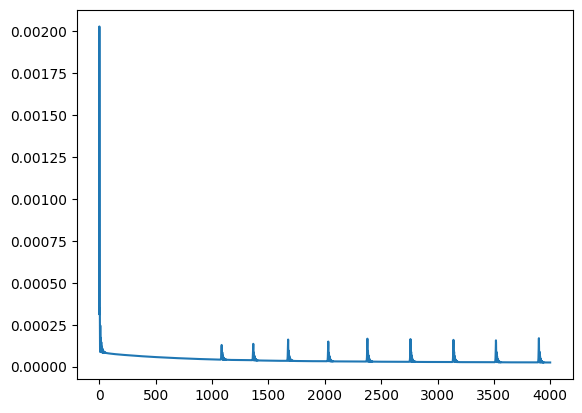

In [186]:
import numpy as np 
plt.plot(np.array(aja.loss).T[0])
#plt.ylim(0,1e-3)

In [136]:
from jax import jit,vmap
from sheap.Fitting.utils import combine_auto
ff = aja.mapping_lines("region","continuum")
profile_functions = list(ff["profile_functions"])
id_params = list(ff["profile_params_index_list"])
combine = jit(combine_auto(profile_functions))
comb_v = vmap(jit(combine_auto(profile_functions)),in_axes=(0,0))
Fe_2 = comb_v(aja.spec[:,0,:],aja.params[:,id_params])

Array([[0.55752885, 0.55752885, 0.55752885, 0.55752885, 0.55752885],
       [0.96282901, 0.96282901, 0.96282901, 0.96282901, 0.96282901],
       [1.05231921, 1.05231921, 1.05231921, 1.05231921, 1.05231921],
       [1.16495936, 1.16495936, 1.16495936, 1.16495936, 1.16495936],
       [1.85334529, 1.85334529, 1.85334529, 1.85334529, 1.85334529],
       [0.99818694, 0.99818694, 0.99818694, 0.99818694, 0.99818694],
       [0.37892104, 0.37892104, 0.37892104, 0.37892104, 0.37892104],
       [0.4550872 , 0.4550872 , 0.4550872 , 0.4550872 , 0.4550872 ],
       [0.84694175, 0.84694175, 0.84694175, 0.84694175, 0.84694175],
       [2.2985843 , 2.2985843 , 2.2985843 , 2.2985843 , 2.2985843 ],
       [0.21018175, 0.21018175, 0.21018175, 0.21018175, 0.21018175],
       [0.78910172, 0.78910172, 0.78910172, 0.78910172, 0.78910172],
       [0.17934945, 0.17934945, 0.17934945, 0.17934945, 0.17934945],
       [1.20434949, 1.20434949, 1.20434949, 1.20434949, 1.20434949],
       [1.44264873, 1.44264873, 1.

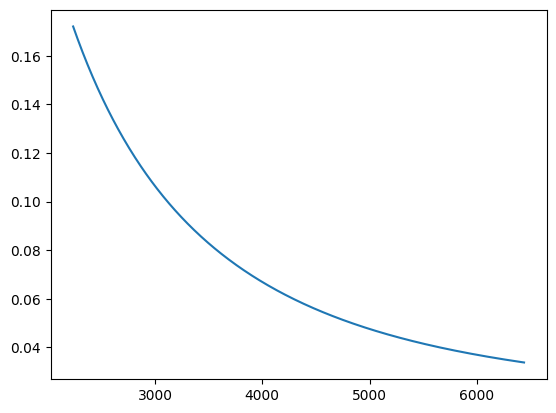

In [133]:
n = 8
#plt.plot(aja.spec[:,0,:][n],Fe[n])
plt.plot(aja.spec[:,0,:][n],Fe_2[n])

In [137]:
id_params

[np.int64(42), np.int64(43)]

In [ ]:
aja.params[:,id_params]


Array([[-1.23969445,  0.55752885],
       [-1.        ,  0.96282901],
       [-1.17306153,  1.05231921],
       [-1.        ,  1.16495936],
       [-1.        ,  1.85334529],
       [-1.13931156,  0.99818694],
       [-1.47064765,  0.37892104],
       [-1.00100209,  0.4550872 ],
       [-1.        ,  0.84694175],
       [-1.30903382,  2.2985843 ],
       [-1.34284763,  0.21018175],
       [-1.43256467,  0.78910172],
       [-1.        ,  0.17934945],
       [-1.        ,  1.20434949],
       [-1.11943213,  1.44264873],
       [-1.55960274,  1.03007037],
       [-1.07893696,  0.41411493],
       [-1.        ,  0.38469797],
       [-1.        ,  0.42892102],
       [-1.35803199,  0.57435621],
       [-1.43510855,  1.10703048],
       [-1.33918438,  0.80268547],
       [-1.09678427,  1.1514135 ],
       [-1.        ,  0.13306621],
       [-1.5108134 ,  0.19613363],
       [-1.        ,  1.88348889],
       [-1.        ,  0.22805716],
       [-1.15119844,  0.1736547 ],
       [-1.        ,

AttributeError: 'Sheapectral' object has no attribute 'spec'

In [ ]:
#def ShapeSave()

In [ ]:
# aja.region_defs_["fitting_rutine"]["step1"]['tied']

[['center_FeIIa_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIa_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIb_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIb_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIc_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIc_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIId_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIId_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIe_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIe_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIf_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIf_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIg_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIg_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIi_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIi_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIj_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIj_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIk_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIk_20_fe', 'width_FeIIh_20_fe'],
 ['center_FeIIl_20_fe', 'center_FeIIh_20_fe'],
 ['width_FeIIl_20_fe', 'width_FeI

['106 127 -212.91599999999926',
 '107 128 *1',
 '109 127 -182.2569999999996',
 '110 128 *1',
 '112 127 -160.59999999999945',
 '113 128 *1',
 '115 127 -138.34399999999914',
 '116 128 *1',
 '118 127 -17.321999999999207',
 '119 128 *1',
 '121 127 -6.391999999999825',
 '122 128 *1',
 '124 127 -3.0869999999995343',
 '125 128 *1',
 '130 127 +28.720000000000255',
 '131 128 *1',
 '133 127 +37.05000000000018',
 '134 128 *1',
 '136 127 +108.95500000000084',
 '137 128 *1',
 '139 127 +499.33700000000044',
 '140 128 *1',
 '142 127 +737.317',
 '143 128 *1',
 '145 127 +764.3590000000004',
 '146 128 *1',
 '148 127 +795.9530000000004',
 '149 128 *1',
 '46 73 -530.1799999999994',
 '47 74 *1',
 '49 73 -375.0102999999999',
 '50 74 *1',
 '52 73 -353.9262999999992',
 '53 74 *1',
 '55 73 -284.4299999999994',
 '56 74 *1',
 '58 73 -244.23999999999978',
 '59 74 *1',
 '61 73 -231.21999999999935',
 '62 74 *1',
 '64 73 -202.35999999999967',
 '65 74 *1',
 '67 73 -49.10999999999967',
 '68 74 *1',
 '70 73 -39.4099999

In [ ]:
# region = RegionBuilder(4400, 5600)
# region.make_region(verbose=True,Fe_regions=['Fe_uv',"FeII_IZw1","feII_forbidden","FeII_coronal"],force_linear=True
#                    ,n_broad = 2,n_narrow =1,narrow_plus=False,add_out_flow=True,tied_narrow_to="OIIIc",template_mode_Fe=False)
# Hbeta_class = RegionFitting(region.to_complex(add_free=True))

We assume a local linear continuum


In [ ]:
class BalCon(model.RegriddableModel1D):
    def __init__(self, name="BalCon"):
        self.A = model.Parameter(name, "A", 1, min=tinyval, hard_min=0)
        self.T = model.Parameter(
            name, "T", 10000, min=5000, frozen=False, units="kelvins"
        )
        self.tau = model.Parameter(
            name, "tau", 1, min=0.01, hard_min=tinyval, max=2)

        model.RegriddableModel1D.__init__(
            self, name, (self.A, self.T, self.tau))

    def calc(self, pars, x, *args, **kwargs):
        """Evaluate the model"""
        return _balmer_conti(pars, x)

In [207]:
import jax.numpy as jnp
from jax import jit

@jit
def balmer_conti_jax(x,pars):
    """
    Compute the Balmer continuum (Dietrich+02) in pure JAX.

    Parameters
    ----------
    x : array-like
        Wavelengths in Angstrom.
    pars : array-like, shape (3,)
        pars[0] = A (amplitude)
        pars[1] = T (temperature in K)
        pars[2] = τ0 (optical‐depth scale)
   

    Returns
    -------
    result : ndarray
        Balmer continuum flux in the same shape as x.
    """
    # Constants
    h   = 6.62607015e-34   # Planck’s constant, J·s
    c   = 2.99792458e8     # Speed of light, m/s
    k_B = 1.380649e-23     # Boltzmann constant, J/K

    # Edge
    lambda_BE = 3646.0  # Å

    # Convert Å → m
    lam_m = x * 1e-10

    # Planck function B_λ(lam_m, T) [SI units]
    T = pars[1]
    exponent = h * c / (lam_m * k_B * T)
    B_lambda = (2.0 * h * c**2) / (lam_m**5 * (jnp.exp(exponent) - 1.0))

    # Apply the same “scale=10000” factor as in astropy’s BlackBody
    B_lambda *= 1e5

    # Optical depth τ(λ)
    tau = pars[2] * (x / lambda_BE)**3

    # Balmer-continuum formula
    result = pars[0] * B_lambda * (1.0 - jnp.exp(-tau))

    # Zero above the Balmer edge
    result = jnp.where(x > lambda_BE, 0.0, result)/1e18 #factor the normalisacion

    return result


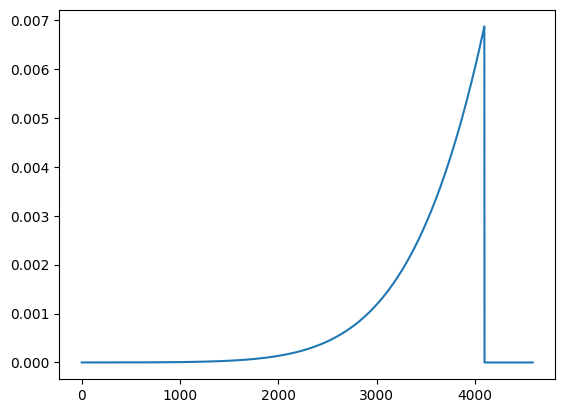

In [209]:
plt.plot(balmer_conti_jax(aja.spec[:,0,:],jnp.array([1,5000,0.01]))[0])